## 점진적인 학습
만약 훈련 데이터가 한 번에 준비되는 것이 아니라 조금씩 전달된다고 할 때, 어떤 데이터를 소실시키지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방식을 **점진적 학습(incremental learning)** 혹은 온라인 학습이라 한다. 대표적인 점진적 학습 알고리즘으로 **확률적 경사 하강법(Stochastic Gradient Descent)**이 있다

### 확률적 경사 하강법
언덕에서 공을 굴린다고 생각해봤을 때, 가장 빠르게 내려오는 방법은 가장 가파른 지형을 따라 내려오는 것이다. 확률적 경사 하강법(SGD)은 이런 식으로, 가장 가파른 경사를 따라 목표 지점에 도달하는 것이다. 이때 주의해야할 점은 한 번에 긴 거리를 가게 된다면 목표 지점인 부분을 넘어 다시 위로 올라갈 수 있다(가속도가 있다면 한 번에 멈추기 어려운 점을 떠올리자). 따라서 경사를 내려올 때는 가파른 경사를 따라 조금씩 내려오는 것이 중요하고, 이렇게 내려오는 과정이 SGD 모델을 훈련하는 과정이다

SGD에서 확률적이라는 의미는, 경사 하강법을 통해 가장 가파른 길을 찾을 때 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련셋에서 랜덤하게 골라 가장 가파른 길을 찾는다는 것이다. 훈련셋에서 랜덤하게 하나의 샘플을 선택해 가파른 경사를 조금 내려가고, 이런 식으로 해서 전체 샘플을 모두 사용한다. 이때 목표 지점에 도달하지 못했다면? 다시 훈련셋을 모두 사용해서 전에 했던 훈련을 반복하는데, 여기서 훈련셋을 한 번 모두 사용하는 과정을 **에폭(epoch)**이라고 부른다

SGD에서처럼 하나씩 훈련셋에서 뽑아 훈련하지 않고, 몇 개의 샘플을 동시에 사용해서 경사 하강법을 수행하면 **미니배치 경사 하강법(minibatch gradient descent)**이라 하고, 전체 샘플을 사용하면 **배치 경사 하강법(batch gradient descent)**이라 한다

### 손실 함수
빠르게 내려오려고하는 언덕 자체를 손실 함수라 할 수 있다. **손실함수(loss function)**는 어떤 문제에서 머신러닝 알고리즘의 예측 실패 정도를 측정하는 기준이다. 손실 함수의 최소값은 없으나 손실 함수의 값이 작을 수록 좋다

분류에서의 손실은 오답을 예측하는 것이다. 한 훈련셋에 대한 예측이 다음과 같다면
1. 예측: 1, 정답: 1
2. 예측: 0, 정답: 1
3. 예측: 0, 정답: 0
4. 예측: 1, 정답: 0

정확도는 2/4 = 0.5다. 만약 정확도에 음수를 취한 값을 손실 함수로 잡는다면, -1이 가장 낮고, -0이 가장 높은 손실 함수가 될 수 있다. 그러나 여기에서 문제는 정확도는 미분 불가능하다는 점이다. 앞에서처럼 4개의 샘플이 있다면 가능한 손실 함수의 값은 0, 0.25, 0.5, 0.75, 1로 5개밖에 없다. 경사 하강법에서 아주 조금씩 내려오는 것을 구현하려면 손실 함수는 미분 가능해야한다. 이렇게 연속적이고 미분 가능한 손실 함수를 만들기 위해서 로지스틱 손실함수를 사용할 수 있다.

### 로지스틱 손실 함수
위의 샘플 4개의 예측 성공 확률을 0.9, 0.3, 0.2, 0.8이라 하자. 

첫 번째 샘플 예측은 0.9이고, 정답이 양성 클래스(1)므로 -(1 * 0.9) = -0.9가 손실 함수가 된다. 

두 번째 샘플 예측은 0.3이고, 정답이 양성 클래스이므로 -(1 * 0.3) = -0.3이 손실 함수가 된다. 

세 번째 샘플 예측은 0.2인데, 정답이 음성 클래스이므로 그대로 0 * 0.2가 되면 무조건 0이 되므로 타깃을 양성 클래스로 바꾸고, 예측값도 양성 클래스에 대한 예측으로 바꾼다. 즉 1 - 0.2 = 0.8로 만들고, 이를 손실함수로 바꾸면 -(1 * 0.8) = -0.8이 손실 함수가 된다.

네 번째 샘플 예측은 0.8이고, 타깃이 음성 클래스이므로 세 번째 샘플과 동일한 방법을 취한다. 따라서 -(1 * 0.2) = -0.2가 손실 함수가 된다

이 예측 확률에 로그 함수를 적용하면 더 좋다. 예측 확률 범위는 0 ~ 1인데, 이 예측 확률 범위의 값에 로그를 취하면 음수가 된다. 이렇게 되면 최종 손실 함수는 양수가 되므로 손실에 대해 이해하기 쉽고, 또한 로그 함수는 0에 가까울 수록 매우 큰 음수가 되므로 손실을 극대화하여 모델에 큰 영향을 미칠 수 있다

정리하면 타깃이 양성 클래스일 때 (타깃이 1일 때) 손실은 -log(예측 확률)이 되고, 음성 클래스일 때 손실은 -log(1 - 예측 확률)로 계산이 된다. 이 손실 함수를 **로지스틱 손실 함수(logistic loss function)** 또는 **이진 크로스엔트로피 손실 함수(binary cross-entrophy loss function)**이라 한다. 다중 분류에서의 손실 함수는**크로스엔트로피 손실 함수(cross-entrophy loss function)**라고 한다

분류가 아닌 회귀에서의 손실 함수는 보통 타깃에서 예측을 뺀 절댓값을 모든 샘플에 평균한 값인 평균 절댓값 오차를 사용하거나, 타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값인 **평균 제곱 오차(mean squared error)**를 많이 사용한다

## SGDClassifier
아래에서 확률적 경사 하강법을 구현해보자

In [4]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

# Species 열을 제외한 나머지 5개는 입력 데이터로 사용, Species 열은 타깃 데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

# 데이터 훈련셋, 테스트셋으로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

# 훈련셋, 테스트셋 특성을 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# SGD
from sklearn.linear_model import SGDClassifier

# loss='log': 로지스틱 손실함수 지정, max_iter: 에폭 횟수 지정
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [5]:
# partial_fit으로 모델 이어서 훈련 가능
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


## 에폭과 오버/언더피팅
에폭이 적으면 모델이 훈련셋을 덜 학습할 수 있다. 에폭 횟수가 적절히 많아야 훈련셋을 완전히 학습할 수 있다. 즉 적은 에폭 횟수 동안에 훈련한 모델은 언더피팅일 가능성이 높고, 많은 에폭 횟수 동안에는 테스트셋에는 점수가 떨어지는 오버피팅일 가능성이 높다. 에폭이 진행될 수록 훈련셋의 점수는 꾸준히 증가하고, 테스트셋의 점수는 어느 순간 감소하기 시작하는데, 이 시점이 모델이 오버피팅되기 시작하는 곳이고 이것이 시작되기 전에 훈련을 멈추는 것을 **조기 종료(early stopping)**라 한다. 이에 관련된 그래프를 그려보자

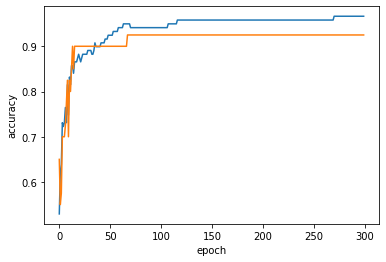

In [6]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

# 300번 에폭 반복
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [7]:
# 100번째 에폭이 적절하다 판단
# tol=None으로 지정함으로써 조기종료 하지 않고 무조건 100 에폭 돌도록
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 참고: loss 매개변수의 기본 값은 'hinge'이다. 힌지 손실(hinge loss)은
# 서포트 벡터 머신이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실함수다

0.957983193277311
0.925
